**Задание 1**

**Описание проекта**
1. Необходимо получить данные с сайта https://fakestoreapi.com/ с помощью Python, сформировать csv файл с описанием 10 любых продуктов. (преобразование из формата json в csv должно происходить внутри кода).
2. С помощью Python открыть csv файл из задания 1 и разделить товары на категории в зависимости от цены: cheap - нижние 30% при сортировке по стоимости; middle - 40-70% при сортировке по стоимости; expensive - верхние 30% при сортировке по стоимости. Разделить полученные данные на 3 отдельных файла excel в соответствии с полученной категорией. 

In [32]:
# Импорт необходимых библиотек
import requests
import pandas as pd

_**1. Выгрузим данные с сайта https://fakestoreapi.com/ с помощью Python, сформируем csv файл с описанием 10 любых продуктов**_

In [33]:
# Получение данных с сайта
response = requests.get('https://fakestoreapi.com/products')
data = response.json()

# Преобразование данных в DataFrame
df = pd.DataFrame(data)

# Вывод общей информации о датафрейме для проверки корректности данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   title        20 non-null     object 
 2   price        20 non-null     float64
 3   description  20 non-null     object 
 4   category     20 non-null     object 
 5   image        20 non-null     object 
 6   rating       20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB


***Вывод:*** Тип данных соответствует содержимому, пропущенных данных не обнаружено. Можно продолжить анализ данных.

In [34]:
# Выбор 10 случайных продуктов
df_sample = df.sample(n=10, random_state=1)

# Запись DataFrame в CSV файл
output_path = r'products.csv'
df_sample.to_csv(output_path, index=False)

print(f"Данные сохранены в файл {output_path}.")

Данные сохранены в файл products.csv.


In [35]:
# Чтение CSV файла и отображение его содержимого
df_read = pd.read_csv(output_path)
print("Содержимое файла:")
print(df_read)

Содержимое файла:
   id                                              title   price  \
0   4                               Mens Casual Slim Fit   15.99   
1  17  Rain Jacket Women Windbreaker Striped Climbing...   39.99   
2   7                         White Gold Plated Princess    9.99   
3  11  Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...  109.00   
4   3                                 Mens Cotton Jacket   55.99   
5  15  BIYLACLESEN Women's 3-in-1 Snowboard Jacket Wi...   56.99   
6   5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   
7  18        MBJ Women's Solid Short Sleeve Boat Neck V     9.85   
8   8  Pierced Owl Rose Gold Plated Stainless Steel D...   10.99   
9   2             Mens Casual Premium Slim Fit T-Shirts    22.30   

                                         description          category  \
0  The color could be slightly different between ...    men's clothing   
1  Lightweight perfet for trip or casual wear---L...  women's clothing   
2  Classic 

**Вывод:** Были получены данные с сайта и выполнена их проверка. Данные были отсортированы в соответствии с заданием и сохранены в файл под названием 'products.csv' в формате CSV.

--------------------------

**Задание 2**

_**Описание:**_ 

С помощью Python открыть csv файл из задания 1 и разделить товары на категории в зависимости от цены: cheap - нижние 30% при сортировке по стоимости; middle - 40-70% при сортировке по стоимости; expensive - верхние 30% при сортировке по стоимости. Разделить полученные данные на 3 отдельных файла excel в соответствии с полученной категорией. 

_**1. С помощью Python откроем csv файл 'products.csv' и разделим товары на категории в зависимости от цены**_

In [36]:
# Чтение данных из CSV файла
df = pd.read_csv(output_path)

# Сортировка данных по цене
df_sorted = df.sort_values(by='price')

# Определеним границы для категорий
n = len(df_sorted)
cheap_boundary = int(n * 0.3)
middle_boundary_start = int(n * 0.3)
middle_boundary_end = int(n * 0.7)

# Разделим данные на категории
cheap = df_sorted.iloc[:cheap_boundary]
middle = df_sorted.iloc[middle_boundary_start:middle_boundary_end]
expensive = df_sorted.iloc[middle_boundary_end:]

# Запись данных в отдельные файлы Excel
cheap.to_excel('cheap_products.xlsx', index=False)
middle.to_excel('middle_products.xlsx', index=False)
expensive.to_excel('expensive_products.xlsx', index=False)

print("Данные разделены на категории и сохранены в файлы Excel.")

Данные разделены на категории и сохранены в файлы Excel.


In [30]:
# Чтение и вывод содержимого файлов Excel на экран
cheap_read = pd.read_excel('cheap_products.xlsx')

print("Содержимое файла 'cheap_products':")
display(cheap_read)

Содержимое файла 'cheap_products':


,id,title,price,description,category,image,rating
0,18,MBJ Women's Solid Short Sleeve Boat Neck V,9.85,"95% RAYON 5% SPANDEX, Made in USA or Imported,...",women's clothing,https://fakestoreapi.com/img/71z3kpMAYsL._AC_U...,"{'rate': 4.7, 'count': 130}"
1,7,White Gold Plated Princess,9.99,Classic Created Wedding Engagement Solitaire D...,jewelery,https://fakestoreapi.com/img/71YAIFU48IL._AC_U...,"{'rate': 3, 'count': 400}"
2,8,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,Rose Gold Plated Double Flared Tunnel Plug Ear...,jewelery,https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...,"{'rate': 1.9, 'count': 100}"


In [31]:
middle_read = pd.read_excel('middle_products.xlsx')

print("Содержимое файла 'middle_products.xlsx':")
display(middle_read)

Содержимое файла 'middle_products.xlsx':


,id,title,price,description,category,image,rating
0,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,17,Rain Jacket Women Windbreaker Striped Climbing...,39.99,Lightweight perfet for trip or casual wear---L...,women's clothing,https://fakestoreapi.com/img/71HblAHs5xL._AC_U...,"{'rate': 3.8, 'count': 679}"
3,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"


In [32]:
expensive_read = pd.read_excel('expensive_products.xlsx')

print("Содержимое файла 'expensive_products.xlsx':")
display(expensive_read)

Содержимое файла 'expensive_products.xlsx':


,id,title,price,description,category,image,rating
0,15,BIYLACLESEN Women's 3-in-1 Snowboard Jacket Wi...,56.99,"Note:The Jackets is US standard size, Please c...",women's clothing,https://fakestoreapi.com/img/51Y5NI-I5jL._AC_U...,"{'rate': 2.6, 'count': 235}"
1,11,Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...,109.00,3D NAND flash are applied to deliver high tran...,electronics,https://fakestoreapi.com/img/71kWymZ+c+L._AC_S...,"{'rate': 4.8, 'count': 319}"
2,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"


**Вывод:** Все товары разделили на категории в зависимости от цены и сохранили каждую категорию в отдельный Excel-файл.

---------------------------

**Задание 3**

_**Описание:**_

В файле "Тест на джуна" на листе "Задание 3" приведена таблица со ставками за целевое действие пользователья в приложении (CPA). Посчитать ROI для каждого клиента и, где ROI ниже 100% предложить такую ставку партнёру, чтобы ROI был равен 200%. Примечания: 1. ставка партнёрам всегда в долларах США. 2. профит рассчитывается как ставка нам минус ставка партнёру.

_**План работы**_
1. Преобразуем все ставки в доллары США для единообразия.
2. Рассчитаем ROI для каждого клиента.
3. Найдем клиентов, у которых ROI ниже 100%, и предложим новую ставку партнёру, чтобы ROI был равен 200%.

_**Решение:**_

Для начала, установим курсы валют для преобразования в доллары США. Допустим, что курсы валют следующие (для примера):

1 RUB = 0.01 USD
1 EUR = 1.09 USD
1 AUD = 0.67 USD

In [33]:
import pandas as pd
from IPython.display import display, Markdown

# Укажем путь к вашему Excel файлу
file_path = 'Тест на джуна.xlsx'

# Определим диапазон строк и столбцов, который вы хотите загрузить
sheet_name = 'Задание 3'
start_row = 3  # строки в pandas нумеруются с 0, поэтому строка 5 в Excel - это 4 в pandas
nrows = 5  # количество строк, которые необходимо загрузить
usecols = 'A:D'  # диапазон столбцов

# Загрузим данные из указанного диапазона
df_task_3 = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=start_row, nrows=nrows, usecols=usecols)

# Выведим DataFrame на экран
display(df_task_3)


,Клиент,Ставка нам,Валюта,Ставка партнёру
0,Клиент 1,5000,RUB,40
1,Клиент 2,120,EUR,55
2,Клиент 3,80,USD,40
3,Клиент 4,65,AUD,60


_**1. Преобразуем все ставки в доллары США для единообразия**_

In [34]:
import pandas as pd

# Укажем путь к вашему Excel файлу
file_path = 'Тест на джуна.xlsx'

# Определим диапазон строк и столбцов, который мы хотите загрузить
sheet_name = 'Задание 3'
start_row = 3  
nrows = 5  
usecols = 'A:D'  

# Загрузим данные из указанного диапазона
df_task_3 = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=start_row, nrows=nrows, usecols=usecols)

# Преобразование ставок в доллары США
exchange_rates = {
    'RUB': 0.01,
    'EUR': 1.09,
    'USD': 1,
    'AUD': 0.67
}

# Преобразование столбца "Ставка нам" в доллары США
df_task_3['Ставка нам (USD)'] = df_task_3.apply(lambda row: row['Ставка нам'] * exchange_rates[row['Валюта']], axis=1)

# Вывод DataFrame на экран для проверки
display(df_task_3)

,Клиент,Ставка нам,Валюта,Ставка партнёру,Ставка нам (USD)
0,Клиент 1,5000,RUB,40,50.00
1,Клиент 2,120,EUR,55,130.80
2,Клиент 3,80,USD,40,80.00
3,Клиент 4,65,AUD,60,43.55


_**Вывод:**_ Преобразовали столбец "Ставки нам" к единой валюте. 

_**2. Рассчитаем ROI для каждого клиента**_

In [35]:
# Рассчет профита и ROI
df_task_3['Профит'] = df_task_3['Ставка нам (USD)'] - df_task_3['Ставка партнёру']
df_task_3['ROI'] = (df_task_3['Профит'] / df_task_3['Ставка партнёру']) * 100

# Вывод DataFrame на экран для проверки
display(df_task_3)

,Клиент,Ставка нам,Валюта,Ставка партнёру,Ставка нам (USD),Профит,ROI
0,Клиент 1,5000,RUB,40,50.00,10.00,25.000000
1,Клиент 2,120,EUR,55,130.80,75.80,137.818182
2,Клиент 3,80,USD,40,80.00,40.00,100.000000
3,Клиент 4,65,AUD,60,43.55,-16.45,-27.416667


_**Вывод:**_ Из полученных расчетов ROI следует, что новую ставку необходимо предложить партнёрам для Клиентов 1 и 4, так как их ROI оказался ниже 100% и равен 25% и -27,42% соответственно.

**3. Для клиентов, у которых ROI ниже 100% предложим новую ставку, чтобы ROI был равен 200%**

In [36]:
# Рассчет новой ставки партнёру для достижения ROI 200%
df_task_3['Новая ставка партнёру (если ROI < 100%)'] = df_task_3.apply(
    lambda row: row['Ставка нам (USD)'] / 3 if row['ROI'] < 100 else row['Ставка партнёру'],
    axis=1
)
df_task_3['new_Профит'] = df_task_3['Ставка нам (USD)'] - df_task_3['Новая ставка партнёру (если ROI < 100%)']
df_task_3['new_ROI'] = (df_task_3['new_Профит'] / df_task_3['Новая ставка партнёру (если ROI < 100%)']) * 100
# Вывод DataFrame на экран для проверки
display(df_task_3)

,Клиент,Ставка нам,Валюта,Ставка партнёру,Ставка нам (USD),Профит,ROI,Новая ставка партнёру (если ROI < 100%),new_Профит,new_ROI
0,Клиент 1,5000,RUB,40,50.00,10.00,25.000000,16.666667,33.333333,200.000000
1,Клиент 2,120,EUR,55,130.80,75.80,137.818182,55.000000,75.800000,137.818182
2,Клиент 3,80,USD,40,80.00,40.00,100.000000,40.000000,40.000000,100.000000
3,Клиент 4,65,AUD,60,43.55,-16.45,-27.416667,14.516667,29.033333,200.000000


_**Вывод:**_ Получили новые ставки партнёрам с ROI 200% для Клиентов 1 и 4 равными 16,67 и 14,52 соответственно.

--------------------------------------------------------------------------

**Задание 4**

_**Описание:**_

Представлена выгрузка о полученных событиях приложения Х при показе рекламы источником У. Условиями договора с рекламодателем определено, что оплачиваются только события, по которым от даты установки до события прошло не более 2 суток. Ставка за событие составляет: 200 у.е. по Сан-Паулу и 100 у.е. по остальным городам. Определить сумму, которую рекламодатель выплатит по результатам данной рекламной компании.

_**План работы:**_
1. Загрузим данные из Excel.
Преобразуем строки с датами в формат даты и времени.
2. Вычислим разницу между временем события и временем установки.
Отберем только те события, разница между временем которых не превышает 2 суток.
Подсчитаем количество событий по городу Сан-Паулу и другим городам.
Рассчитаем сумму выплат по заданным ставкам.

_**Решение:**_

_**1. Загрузим данные из Excel. Преобразуем строки с датами в формат даты и времени.**_

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузим данные из Excel файла
file_path = 'Тест на джуна.xlsx'
sheet_name = 'Задание 4'
start_row = 2
nrows = 173
usecols = 'A:D'

# Загрузим данные из указанного диапазона
df_task_4 = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=start_row, nrows=nrows, usecols=usecols)

# Выведим общую информацию о датасете для проверки корректности данных
df_task_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Install Time  169 non-null    datetime64[ns]
 1   Event Time    169 non-null    datetime64[ns]
 2   Adset         169 non-null    int64         
 3   City          169 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 5.4+ KB


**Вывод:** Необходимо преобразовать столбцы с датами в формат datetime. Все остальные типы данных соответствуют содержимому. Пропущенных значений нет. Можно производить дальнейший анализ данных.

In [53]:
# Переименуем столбцы
df_task_4.columns = ['install_time', 'event_time', 'adset', 'city']

# Преобразуем столбцы с датами в формат datetime
df_task_4['install_time'] = pd.to_datetime(df_task_4['install_time'])
df_task_4['event_time'] = pd.to_datetime(df_task_4['event_time'])

_**2. Вычислим разницу между временем события и временем установки.Отберем только те события, разница между временем которых не превышает 2 суток. Подсчитаем количество событий по городу Сан-Паулу и другим городам. Рассчитаем сумму выплат по заданным ставкам.:**_

In [54]:
# Рассчитаем разницу в днях между событием и установкой
df_task_4['days_diff'] = (df_task_4['event_time'] - df_task_4['install_time']).dt.days

# Отфильтруем события, где разница меньше или равна 2 суток
valid_events = df_task_4[df_task_4['days_diff'] <= 2].copy()

# Определим ставку в зависимости от города
valid_events['rate'] = valid_events['city'].apply(lambda x: 200 if x == 'Sao Paulo' else 100)

# Рассчитайем общую сумму
total_amount = valid_events['rate'].sum()
print(f"Общая сумма, которую рекламодатель выплатит: {total_amount} y.e.")

Общая сумма, которую рекламодатель выплатит: 17300 y.e.


**Вывод к Заданию 4:**  
_**Общая сумма, которую рекламодатель выплатит, составляет 17300 USD**_

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Задание 5**

_**Описание:**_

Используя выгрузку задания 4, определить оптимальные критерии показа рекламы для достижения наилучшей конверсии (определить часовой промежуток показа рекламы, города показа и адсет). Также на основании представленных данных сделать прогноз о количестве событий за весь апрель при сохранении текущих объёмов.

_**План работы:**_
1. Определить оптимальные критерии показа рекламы для достижения наилучшей конверсии;
2. На основании представленных данных сделать прогноз о количестве событий за весь апрель при сохранении текущих объёмов.

_**Решение:**_

_**1. Определим оптимальные критерии показа рекламы для достижения наилучшей конверсии:**_

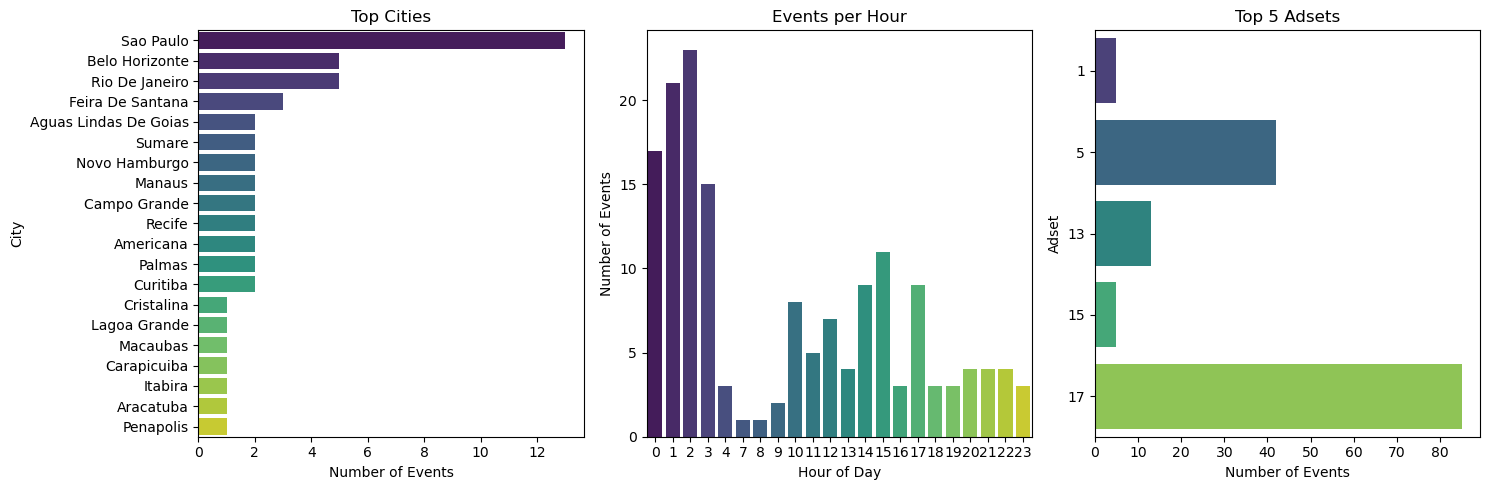

Топ-5 городов для показа рекламы:
Sao Paulo                13
Belo Horizonte            5
Rio De Janeiro            5
Feira De Santana          3
Aguas Lindas De Goias     2
Name: city, dtype: int64

Топ-5 адсетов по количеству событий:
17    85
5     42
13    13
15     5
1      5
Name: adset, dtype: int64



In [55]:
# Добавим столбец с часом события
valid_events['event_hour'] = valid_events['event_time'].dt.hour

# Подсчитаем количество событий по часам, городам и адсетам
events_per_hour = valid_events['event_hour'].value_counts().sort_index()
events_per_city = valid_events['city'].value_counts().sort_values(ascending=False).head(20)
events_per_adset = valid_events['adset'].value_counts().sort_values(ascending=False).head(5)

# Построим диаграммы
plt.figure(figsize=(15, 5))

# Диаграмма по городам
plt.subplot(1, 3, 1)
sns.barplot(x=events_per_city.values, y=events_per_city.index, palette='viridis')
plt.title('Top Cities')
plt.xlabel('Number of Events')
plt.ylabel('City')

# Диаграмма по часовым промежуткам
plt.subplot(1, 3, 2)
sns.barplot(x=events_per_hour.index, y=events_per_hour.values, palette='viridis')
plt.title('Events per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')

# Горизонтальная диаграмма по адсетам
plt.subplot(1, 3, 3)
sns.barplot(x=events_per_adset.values, y=events_per_adset.index, palette='viridis', orient='h')
plt.title('Top 5 Adsets')
plt.xlabel('Number of Events')
plt.ylabel('Adset')

plt.tight_layout()
plt.show()

# Вывод результатов
print(f"Топ-5 городов для показа рекламы:\n{events_per_city.head(5)}\n")
print(f"Топ-5 адсетов по количеству событий:\n{events_per_adset.head(5)}\n")


**Вывод:**

_**Исходя из полученных данных, оптимальными критериями для достижения наилучшей конверсии являются следующие:**_

_**Города для показа рекламы:**_

1. Sao Paulo - 13 событий
2. Belo Horizonte - 5 событий
3. Rio De Janeiro - 5 событий

_**Время показа рекламы:**_

_**Самым оптимальным промежутком времени**_ является период _**от полуночи до 3 часов**_, при этом _**пик количества событий приходится на 2 часа**_. Далее, с чуть меньшей конверсией, следует промежуток около _**10 часов, промежуток с 14 до 15 часов и 17 часов**_.

_**Адсеты с наибольшим количеством событий:**_

1. Адсет 17 - 85 событий
2. Адсет 5 - около 42 событий
3. Адсет 13 - около 13 событий

_**2. На основании представленных данных сделаем прогноз о количестве событий за весь апрель при сохранении текущих объёмов:**_

In [56]:
# Прогнозируем количество событий за весь апрель
events_per_day = valid_events['event_time'].dt.date.value_counts().mean()
total_events_april = events_per_day * 30  # апрель имеет 30 дней

display(Markdown("Вывод:"))
print(f"\nПрогнозируемое количество событий за апрель: {total_events_april:.0f}")

Вывод:


Прогнозируемое количество событий за апрель: 436


**Вывод к заданию 5:** 

_**Прогнозируемое количество событий за апрель 436.**_